In [12]:
from __future__ import print_function
from matplotlib import pyplot as plt
import tensorflow as tf
# get_ipython().magic(u'matplotlib auto')
import tensorflow
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras
# config = tf.ConfigProto( device_count = {'GPU': 0 } )
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import to_categorical
from keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from keras.layers import SeparableConv1D
from keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from keras.regularizers import l2,l1
from keras.layers import BatchNormalization
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping,ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from keras import optimizers
from keras.layers import LSTM
from keras.layers import GRU, SimpleRNN
from keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [13]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [14]:
N_FEATURES = 12

column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)] 
# for column_names in range(1, N_FEATURES+1):
#     column_names = ['Index','emg','stimulus','restimulus','repetition','rerepitition','inclin','glove','acc','force'] 
lst = ['Class_label']
column_names = column_names
print(column_names)

file_path_train= r'C:/Users/user/Desktop/DB2_Extract/Train.csv'
df_Train = pd.read_csv(file_path_train,header=None,names=column_names)


print(file_path_train)

file_path_test= r'C:/Users/user/Desktop/DB2_Extract/Test.csv'
df_Test = pd.read_csv(file_path_test,header=None,names=column_names)
print(file_path_test)
df_Train

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12']
C:/Users/user/Desktop/DB2_Extract/Train.csv
C:/Users/user/Desktop/DB2_Extract/Test.csv


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12
0,0.000010,-0.000004,0.000003,-0.000002,-0.000000,0.000001,0.000009,0.000013,0.000003,-0.000000,0.000000,-0.000014
1,0.000012,-0.000004,0.000003,-0.000002,0.000001,-0.000000,0.000008,0.000016,0.000004,-0.000001,-0.000000,-0.000016
2,0.000012,-0.000001,0.000004,-0.000000,0.000003,-0.000001,0.000006,0.000016,0.000003,-0.000002,-0.000001,-0.000017
3,0.000012,0.000001,0.000006,0.000002,0.000003,0.000001,0.000003,0.000014,0.000001,-0.000004,-0.000001,-0.000019
4,0.000009,0.000001,0.000005,0.000002,0.000004,0.000004,0.000000,0.000010,0.000002,-0.000007,-0.000003,-0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...
78399995,-0.000007,0.000029,-0.000014,-0.000008,-0.000009,-0.000006,-0.000002,-0.000022,0.000003,-0.000010,-0.000001,0.000029
78399996,-0.000009,0.000027,-0.000034,-0.000016,-0.000015,-0.000007,-0.000005,0.000007,0.000004,-0.000010,0.000001,0.000006
78399997,-0.000009,0.000009,-0.000032,-0.000017,-0.000016,-0.000006,-0.000007,0.000050,0.000002,-0.000007,0.000004,-0.000017
78399998,0.000004,-0.000013,-0.000017,-0.000012,-0.000012,-0.000004,-0.000003,0.000087,0.000000,0.000002,0.000005,-0.000032


In [15]:
file_path_train_class_label = r'C:/Users/user/Desktop/DB2_Extract/Train_Class_Label.csv'
train_class_label = pd.read_csv(file_path_train_class_label, header=None, names=['Class_label'])

file_path_test_class_label = r'C:/Users/user/Desktop/DB2_Extract/Test_Class_Label.csv'
test_class_label = pd.read_csv(file_path_test_class_label, header=None, names=['Class_label'])

In [16]:
df_Train = df_Train.astype(np.float32)
train_class_label = train_class_label.astype(np.float32)
df_Test = df_Test.astype(np.float32)
test_class_label = test_class_label.astype(np.float32)

In [17]:
df_Train = pd.concat([df_Train,train_class_label], axis = 1)
df_Test = pd.concat([df_Test,test_class_label], axis = 1)

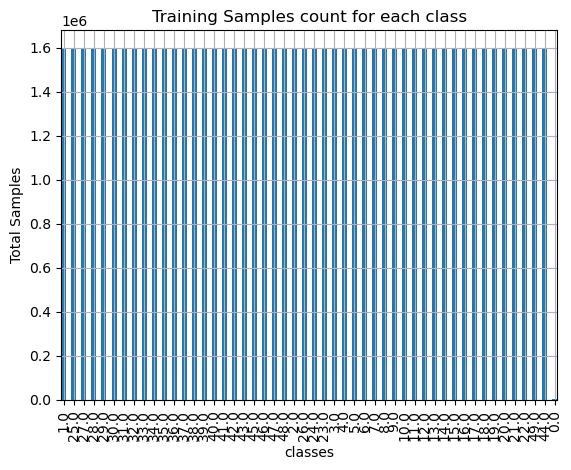

In [18]:
df_Train['Class_label'].value_counts().plot(kind='bar', title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

df_train_size                C1       C2       C3       C4       C5       C6       C7  \
0         0.10074 -0.06943  0.09786 -0.04049  0.00137  0.02243  0.05049   
1         0.12012 -0.06943  0.09786 -0.04049  0.07771  0.00569  0.04362   
2         0.12012 -0.01772  0.12655  0.00695  0.23040 -0.01106  0.02990   
3         0.12012  0.01675  0.18393  0.05440  0.23040  0.02243  0.00931   
4         0.09104  0.01675  0.15524  0.05440  0.30674  0.07266 -0.01128   
...           ...      ...      ...      ...      ...      ...      ...   
78399995 -0.06406  0.49936 -0.38987 -0.18284 -0.68572 -0.09478 -0.02501   
78399996 -0.08344  0.46488 -0.96368 -0.37263 -1.14378 -0.11153 -0.04560   
78399997 -0.08344  0.15464 -0.90630 -0.39635 -1.22012 -0.09478 -0.05932   
78399998  0.04257 -0.22455 -0.47594 -0.27773 -0.91475 -0.06129 -0.03187   
78399999  0.16859 -0.34520 -0.18904 -0.25401 -0.45669 -0.06129  0.02303   

               C8      C9      C10      C11      C12  Class_label  \
0         0.2192

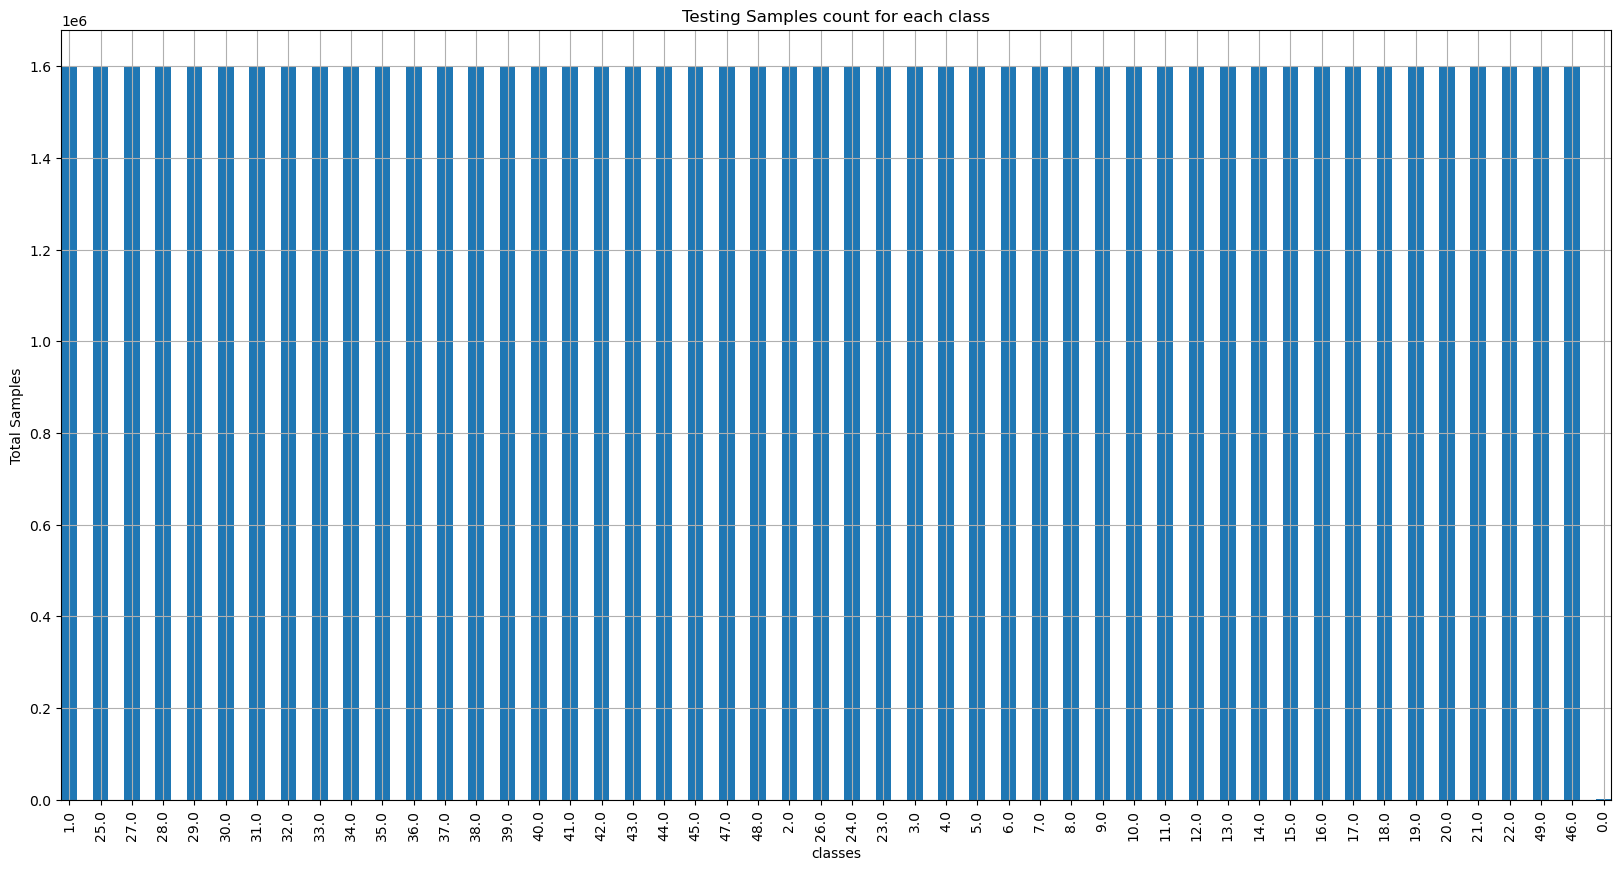

In [19]:
df_Train['Class_label'].value_counts().plot(kind='bar', title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)



# show_basic_dataframe_info(df_Test)
df_Test.head(10)

df_Test['Class_label'].value_counts().plot(kind='bar', title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

# The number of steps within one time segment
TIME_PERIODS = 10000
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 10000

In [26]:
df_Train

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label,ActivityEncoded
0,0.10074,-0.06943,0.09786,-0.04049,0.00137,0.02243,0.05049,0.21928,0.07164,-0.00277,0.00231,-1.14544,1.00000,1
1,0.12012,-0.06943,0.09786,-0.04049,0.07771,0.00569,0.04362,0.27048,0.09454,-0.00932,0.00231,-1.30898,1.00000,1
2,0.12012,-0.01772,0.12655,0.00695,0.23040,-0.01106,0.02990,0.27048,0.07164,-0.01587,-0.04196,-1.39074,1.00000,1
3,0.12012,0.01675,0.18393,0.05440,0.23040,0.02243,0.00931,0.23634,0.02584,-0.02898,-0.04196,-1.55427,1.00000,1
4,0.09104,0.01675,0.15524,0.05440,0.30674,0.07266,-0.01128,0.16807,0.04874,-0.04865,-0.13051,-1.71781,1.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78399995,-0.06406,0.49936,-0.38987,-0.18284,-0.68572,-0.09478,-0.02501,-0.37806,0.07164,-0.06831,-0.04196,2.37051,49.00000,49
78399996,-0.08344,0.46488,-0.96368,-0.37263,-1.14378,-0.11153,-0.04560,0.11687,0.09454,-0.06831,0.04658,0.48988,49.00000,49
78399997,-0.08344,0.15464,-0.90630,-0.39635,-1.22012,-0.09478,-0.05932,0.85075,0.04874,-0.04865,0.17939,-1.39074,49.00000,49
78399998,0.04257,-0.22455,-0.47594,-0.27773,-0.91475,-0.06129,-0.03187,1.48222,0.00294,0.01034,0.22366,-2.61724,49.00000,49


In [40]:
TIME_PERIODS = 10000
STEP_DISTANCE = 10000
LABEL = 'ActivityEncoded'

# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label_series = df[label_name][i: i + time_steps].to_numpy()
      label = np.bincount(label_series).argmax()
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

def step_decay(epoch):
   initial_lrate = 1e-3
   drop = 0.1
   epochs_drop = 70.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate

lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = to_categorical(y_test, num_classes)

# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 25, 400
n_depth=12
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)

x_train shape:  (7839, 10000, 12)
7839 training samples
y_train shape:  (7839,)
10000
12
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0]
x_train shape: (10000, 12)
input_shape: (10000, 12)
[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (7839, 50)
x_test shape:  (3919, 10000, 12)
3919 testing samples
y_test shape:  (3919,)
x_train shape:  (7839, 25, 400, 12)
x_test shape:  (3919, 25, 400, 12)
n_outputs 50
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [42]:
verbose, epochs, batch_size = 1, 200, 16

model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(Flatten()))
# model.add(Flatten())
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.3))
# # model.add(Flatten())
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
model.add(Flatten())
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.3))
# model.add(Dense(2000, activation='tanh'))
model.add(Dense(512, activation='tanh'))
# model.add(Dense(200, activation='tanh'))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Dense(n_outputs, activation='softmax'))

# adam=optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, amsgrad=False)
nadam = optimizers.Nadam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, name='Nadam')
# checkpoint_filepath = '/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/CNN100X100/checkpoint.hdf5'

# checkpoint_callback = ModelCheckpoint(filepath="C:\Users\user\Documents\Jupyter\best_model.h5",verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
# early = EarlyStopping(monitor='val_loss', min_delta=0, patience=75, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=nadam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

# tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/CNN100X100/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)
#  callbacks=[csv_logger,checkpoint_callback,lrate],
# csv_logger = CSVLogger('/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/CNN100X100/LSTM_ninaDB4_100X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=16,validation_data=(x_test, y_test_hot), verbose=1)
# model.load_weights(r"C:\Users\user\Documents\Jupyter\best_model.h5") 
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_18 (TimeD  (None, 25, 200, 64)       6976      
 istributed)                                                     
                                                                 
 time_distributed_19 (TimeD  (None, 25, 200, 64)       256       
 istributed)                                                     
                                                                 
 time_distributed_20 (TimeD  (None, 25, 97, 64)        0         
 istributed)                                                     
                                                                 
 time_distributed_21 (TimeD  (None, 25, 97, 64)        0         
 istributed)                                                     
                                                                 
 time_distributed_22 (TimeD  (None, 25, 49, 64)       

In [43]:
import tensorflow as tf
model.save('model_new.h5') 

c:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
checkpoint = r"C:/Users/user/Documents/Jupyter/model_new.h5"

In [13]:
testing_model = keras.models.load_model(checkpoint)

In [14]:
train_results = model.evaluate(x_train, y_train_hot)
print("train loss, train acc:", train_results)

results = model.evaluate(x_test, y_test_hot)
print("test loss, test acc:", results)

245/245 [==============================] - 28s 114ms/step - loss: 0.1391 - accuracy: 0.9969
train loss, train acc: [0.1391398310661316, 0.9969384074211121]
123/123 [==============================] - 14s 113ms/step - loss: 0.7832 - accuracy: 0.8714
test loss, test acc: [0.7831912636756897, 0.8713957667350769]


In [15]:
from sklearn.metrics import accuracy_score

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.argmax(y_test_hot, axis=1)

test_accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Test accuracy: {test_accuracy:.4f}')

num_examples = 3918

print("True Label   Predicted Label")
print("============================")
for i in range(num_examples):
    print(f"{true_labels[i]:<12} {predicted_labels[i]:<15}")

123/123 [==============================] - 14s 110ms/step
Test accuracy: 0.8714
True Label   Predicted Label
1            1              
1            1              
1            1              
1            1              
1            1              
1            1              
1            6              
1            1              
1            1              
1            1              
1            1              
1            1              
1            1              
1            1              
1            1              
1            28             
1            1              
1            1              
1            1              
1            1              
1            1              
1            1              
1            1              
1            1              
1            1              
1            1              
1            1              
1            1              
1            1              
1            1              
1            1       

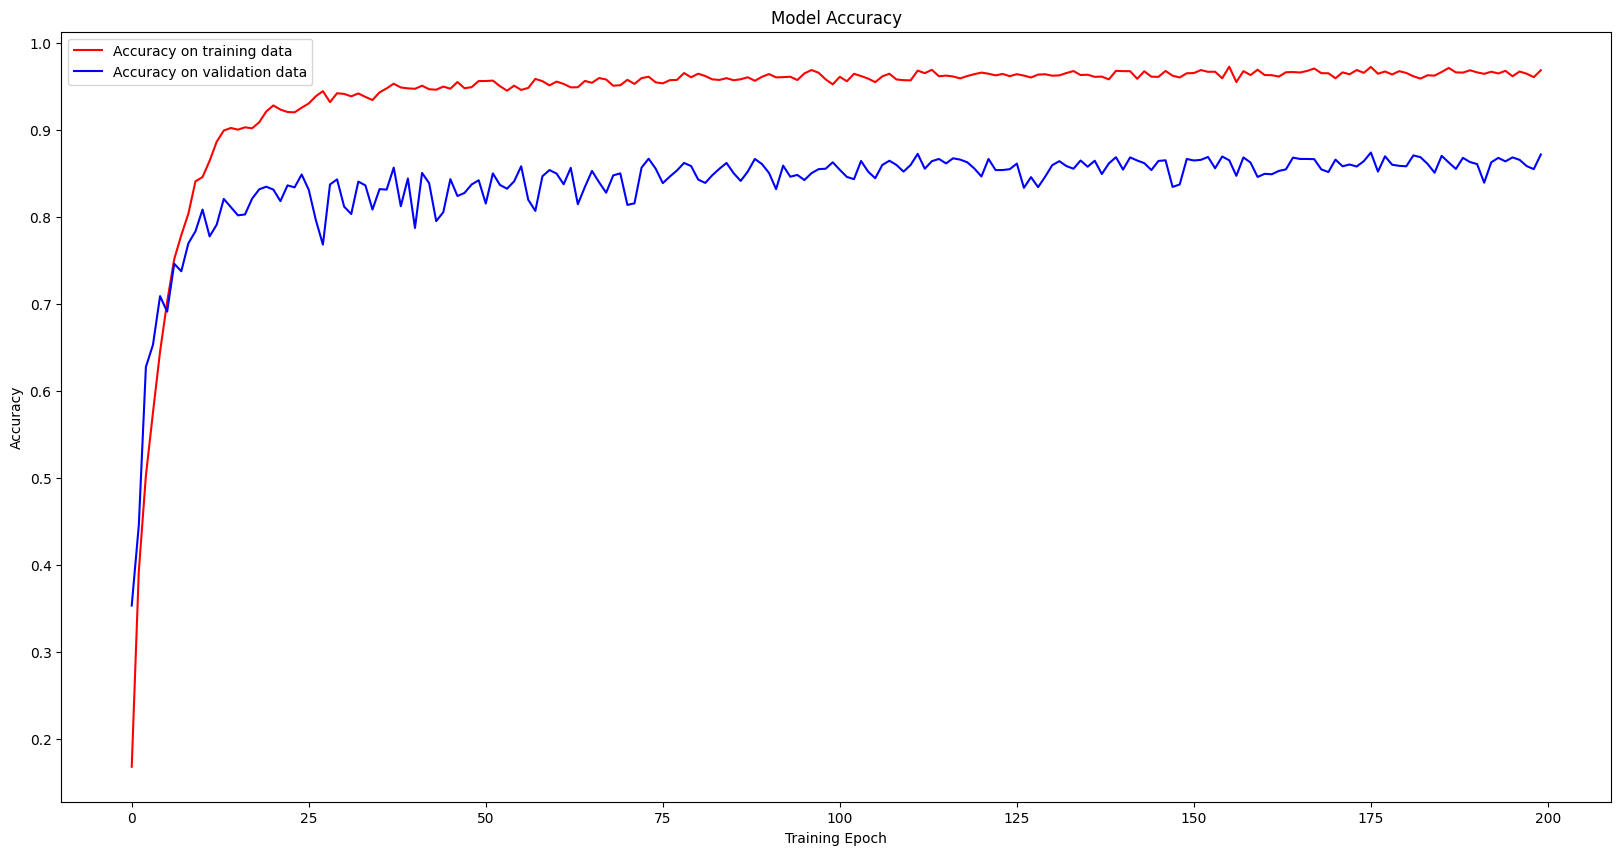

In [16]:
plt.plot(history.history['accuracy'], 'r', label='Accuracy on training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy on validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.legend()

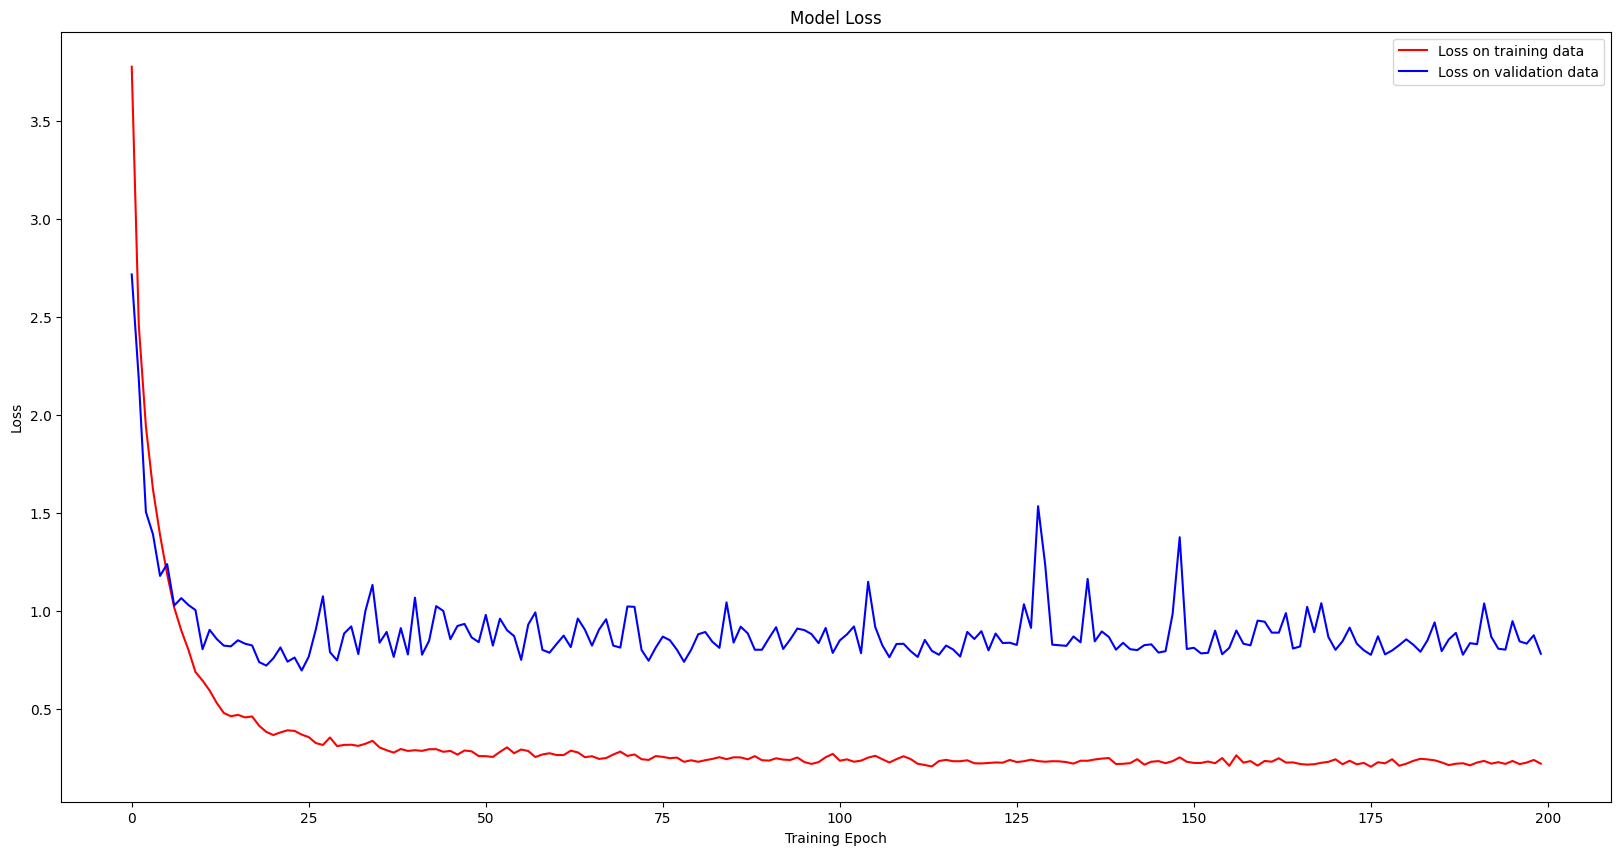

In [17]:
plt.plot(history.history['loss'], 'r', label='Loss on training data')
plt.plot(history.history['val_loss'], 'b', label='Loss on validation data')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.legend()

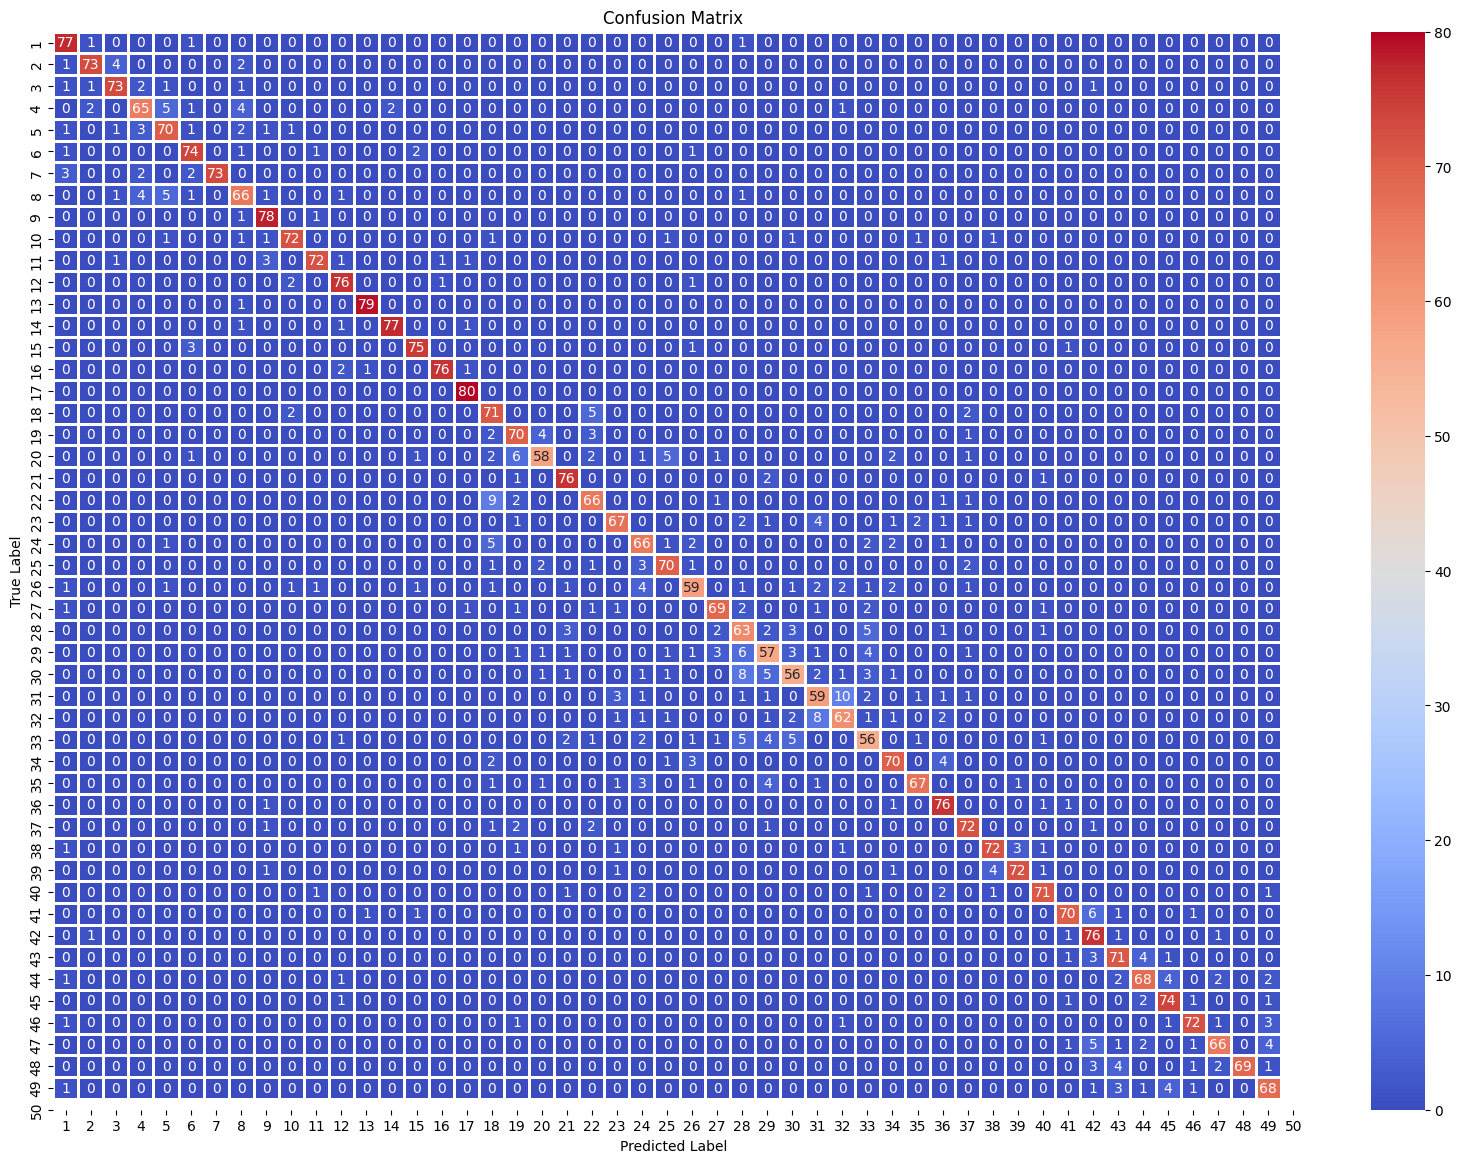

In [18]:
show_confusion_matrix(true_labels, predicted_labels)